In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('California_Power_Plants.csv')
df.head()

,X,Y,OBJECTID,CECPlantID,PlantName,Retired_Plant,OperatorCompanyID,County,Capacity_Latest,Units,PriEnergySource,StartDate
0,-119.567893,36.137170,1865,S0335,Corcoran 2 Solar LLC CED,0,CED California Holdings LLC,Kings,19.8,1,SUN,2015/06/10 00:00:00+00
1,-119.579712,36.144319,1866,S0520,Corcoran 3 Solar,0,CED California Holdings LLC,Kings,20.0,Unit 1,SUN,2016/02/11 00:00:00+00
2,-119.648391,36.269640,1867,C0007,Hanford - Retired October 2011,1,Hanford LP,Kings,24.0,GEN 1,PC,1990/09/01 00:00:00+00
3,-119.647437,36.270308,1868,G0832,Hanford Energy Park Peaker,0,"MRP San Joaquin Energy, LLC",Kings,92.0,"1, 2",NG,2001/09/01 00:00:00+00
4,-119.128325,36.266298,1869,S0608,Exeter Solar,0,Tulare PV I LLC,Tulare,3.5,ES,SUN,2014/02/12 00:00:00+00


In [32]:
len(df)

1802

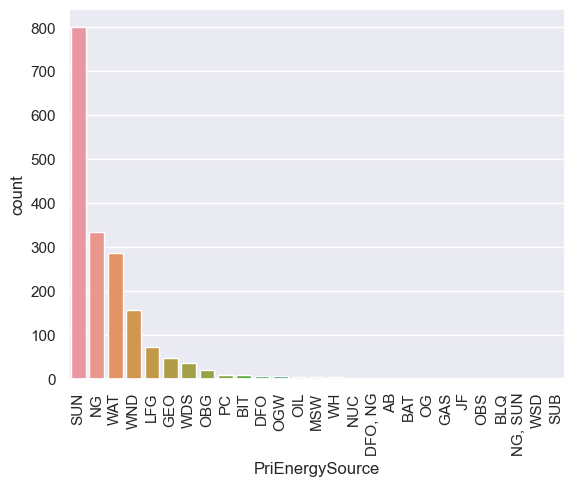

In [31]:
sns.set(color_codes = True)
plot = sns.countplot(x = 'PriEnergySource', data = df, order = df['PriEnergySource'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plt.savefig("PowerPlantHistogram", bbox_inches = 'tight')
plt.show()

In [42]:
# Data is now cleaned
df = pd.read_csv('cali_powerplant_out.csv')
df.head()

,X,Y,OBJECTID,CECPlantID,PlantName,County,Capacity_Latest,StartDate
0,-119.567893,36.137170,1865,S0335,Corcoran 2 Solar LLC CED,Kings,19.8,2015/06/10 00:00:00+00
1,-119.579712,36.144319,1866,S0520,Corcoran 3 Solar,Kings,20.0,2016/02/11 00:00:00+00
2,-119.128325,36.266298,1869,S0608,Exeter Solar,Tulare,3.5,2014/02/12 00:00:00+00
3,-119.134000,36.211778,1870,S0609,Lindsay Solar,Tulare,4.0,2014/01/15 00:00:00+00
4,-119.039944,36.103717,1871,S9325,ImModo California 1 LLC_(East Orosi 1),Tulare,1.5,2013/12/31 00:00:00+00


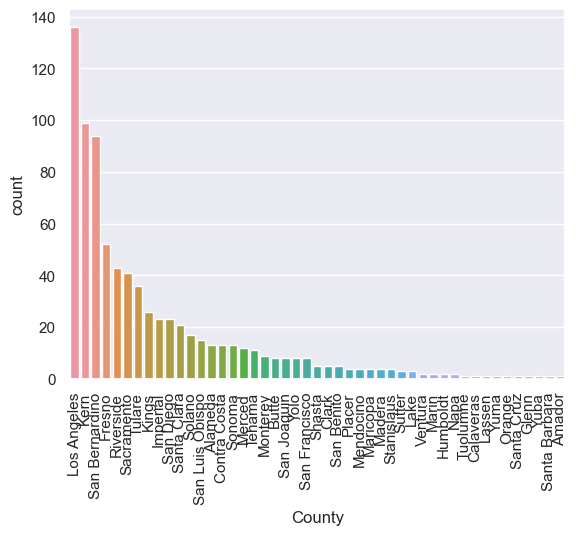

In [43]:
sns.set(color_codes = True)
plot = sns.countplot(x = 'County', data = df, order = df['County'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plt.savefig("PowerPlantCountyHistogram", bbox_inches = 'tight')
plt.show()

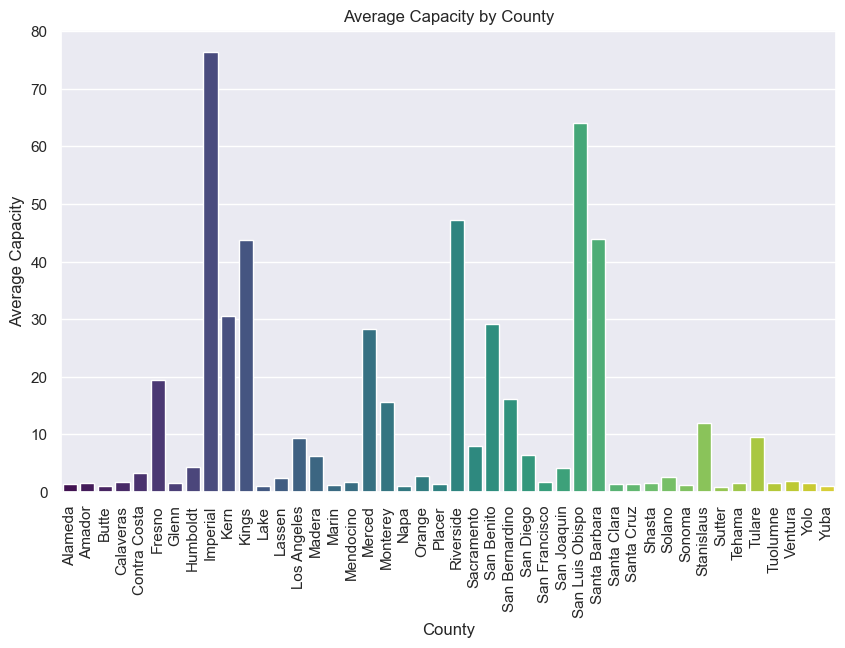

In [46]:
mask = ~df['County'].isin(['Yuma', 'Maricopa', 'Clark'])
df = df[mask]
# Group by County and calculate the average capacity for each county
county_avg_capacity = df.groupby('County')['Capacity_Latest'].mean().reset_index()

# Plot the average capacity for each county using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='County', y='Capacity_Latest', data=county_avg_capacity, palette='viridis')
plt.title('Average Capacity by County')
plt.xlabel('County')
plt.ylabel('Average Capacity')
plt.xticks(rotation = 90)
plt.savefig("Average Capacity by County", bbox_inches='tight')
plt.show()